# Social Security Optimzer

In [2]:
import pandas as pd
import numpy as np
from datetime import date
from dateutil.relativedelta import relativedelta

In [43]:
starting_date = date(2019, 10, 26)
dates = [starting_date + relativedelta(months=i) for i in range(0, 502)]

In [44]:
df = pd.DataFrame(index=dates)
df.head()

Empty DataFrame
Columns: []
Index: [2019-10-26, 2019-11-26, 2019-12-26, 2020-01-26, 2020-02-26]

In [47]:
plan_1_payments = {dte:2362 for dte in dates}
plan_2_payments = {dte:2983 if dte >= date(2022, 7, 26) else 0 for dte in dates}
plan_3_payments = {dte:3859 if dte >= date(2026, 3, 26) else 0 for dte in dates}

In [48]:
df['Plan 1'] = pd.Series(plan_1_payments)
df['Plan 2'] = pd.Series(plan_2_payments)
df['Plan 3'] = pd.Series(plan_3_payments)
df.head()

Plan 1  Plan 2  Plan 3
2019-10-26    2362       0       0
2019-11-26    2362       0       0
2019-12-26    2362       0       0
2020-01-26    2362       0       0
2020-02-26    2362       0       0

In [49]:
i_range = np.arange(0, .101, .001)
i_range

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  ])

In [50]:
int_rates = []
npv_plan1 = []
npv_plan2 = []
npv_plan3 = []

for i_annual in i_range:
    i_monthly = (1+i_annual)**(1/12) - 1
    int_rates.append(i_annual * 100)
    npv_plan1.append(np.npv(i_monthly, df['Plan 1']))
    npv_plan2.append(np.npv(i_monthly, df['Plan 2']))
    npv_plan3.append(np.npv(i_monthly, df['Plan 3']))

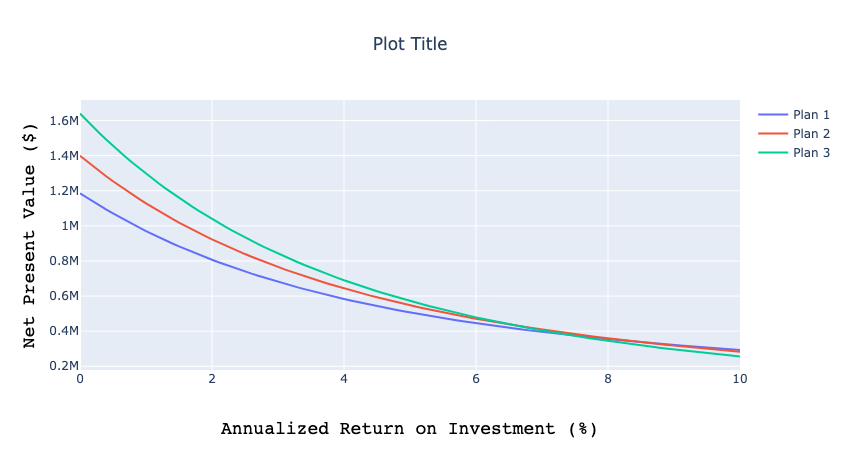

In [54]:
from plotly.offline import iplot
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=int_rates, y=npv_plan1,
                    mode='lines',
                    name='Plan 1'))

fig.add_trace(go.Scatter(x=int_rates, y=npv_plan2,
                    mode='lines',
                    name='Plan 2'))

fig.add_trace(go.Scatter(x=int_rates, y=npv_plan3,
                    mode='lines',
                    name='Plan 3'))

fig.update_layout(
    title=go.layout.Title(
        text="Plot Title",
        xref="paper",
        x=.5
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Annualized Return on Investment (%)",
            font=dict(
                family="Roboto, monospace",
                size=18,
                color="#000000"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Net Present Value ($)",
            font=dict(
                family="Roboto, monospace",
                size=18,
                color="#000000"
            )
        )
    )
)

fig.show()

In [52]:
i_range

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  ])

In [91]:
int_rates = []
end_dates = []
best_option = []

for int_rate in i_range:
    for end_date in df.index[1:]:
        
        int_rates.append(int_rate*100)
        end_dates.append(end_date)
        
        i_monthly = (1+int_rate)**(1/12) - 1
        
        npvs = np.array((np.npv(i_monthly, df.loc[:end_date, 'Plan 1']),
                         np.npv(i_monthly, df.loc[:end_date, 'Plan 2']),
                         np.npv(i_monthly, df.loc[:end_date, 'Plan 3'])))
        
        best_option.append(np.argmax(npvs) + 1)

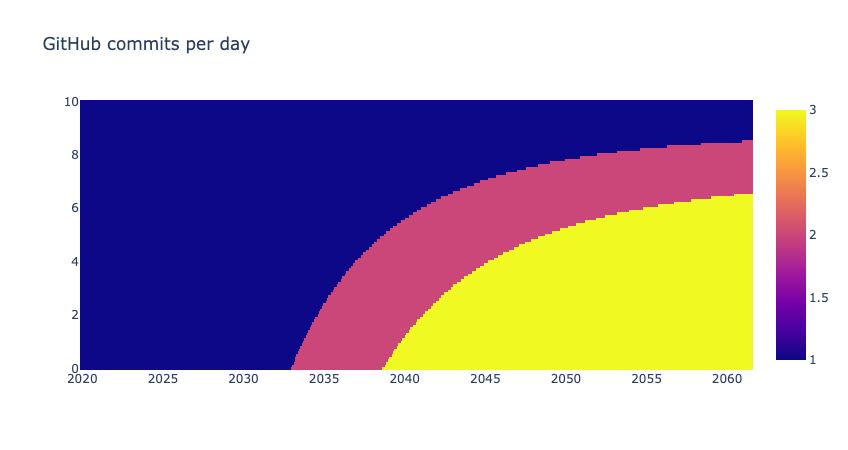

In [94]:
fig = go.Figure(data=go.Heatmap(
        z=best_option,
        x=end_dates,
        y=int_rates))

fig.update_layout(
    title='GitHub commits per day')

fig.show()